<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_2_Basic_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Getting Historical Stock Market Data / BSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br> 
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br> For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>

or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load NSE Data in CSV format

In [213]:
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'19 February 2023'

In [180]:
!wget -q -O bharti.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_Bharti-2020-2022.csv
!wget -q -O hulv.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_HULV-2020-2022.csv
!wget -q -O lnto.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_LNT-2020-2022.csv
!wget -q -O hdfc.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_HDFC-2020-2022.csv

In [142]:
#df = pd.read_csv('bharti.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.sort_values('Date', axis = 0, inplace = True)
#df.set_index('Date',inplace=True)
#df

In [181]:
def BSEcsv2df(fileName):
    df = pd.read_csv(fileName, delimiter =',')
    df['Date'] = pd.to_datetime(df['Date'])
    dropColumns = [ 'WAP',  'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']
    df.drop(dropColumns, axis =1, inplace = True)
    df = df.rename(columns ={'Open Price':'Open','High Price':'High', 'Low Price':'Low','Close Price':'Close','Total Turnover (Rs.)':'Turnover'})
    #df = df.loc[::-1]                                                # clever way to reverse the order of rows, however we are using the sort
    df.sort_values('Date', axis = 0, inplace = True)
    df.set_index('Date',inplace=True)
    return df

#Basic Charts

## One Company

In [182]:
dfBharti = BSEcsv2df('bharti.csv')
dfBharti.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2020-01-01,458.0,460.25,449.80,453.30,178352,2266,81001111.0
2020-01-02,454.0,459.35,453.65,455.00,125575,1688,57206744.0
2020-01-03,455.0,459.15,451.70,455.00,147522,1942,67115198.0
2020-01-06,457.0,457.40,444.85,449.50,200439,2943,90156537.0
2020-01-07,454.0,455.20,443.10,445.35,102581,1895,45935999.0


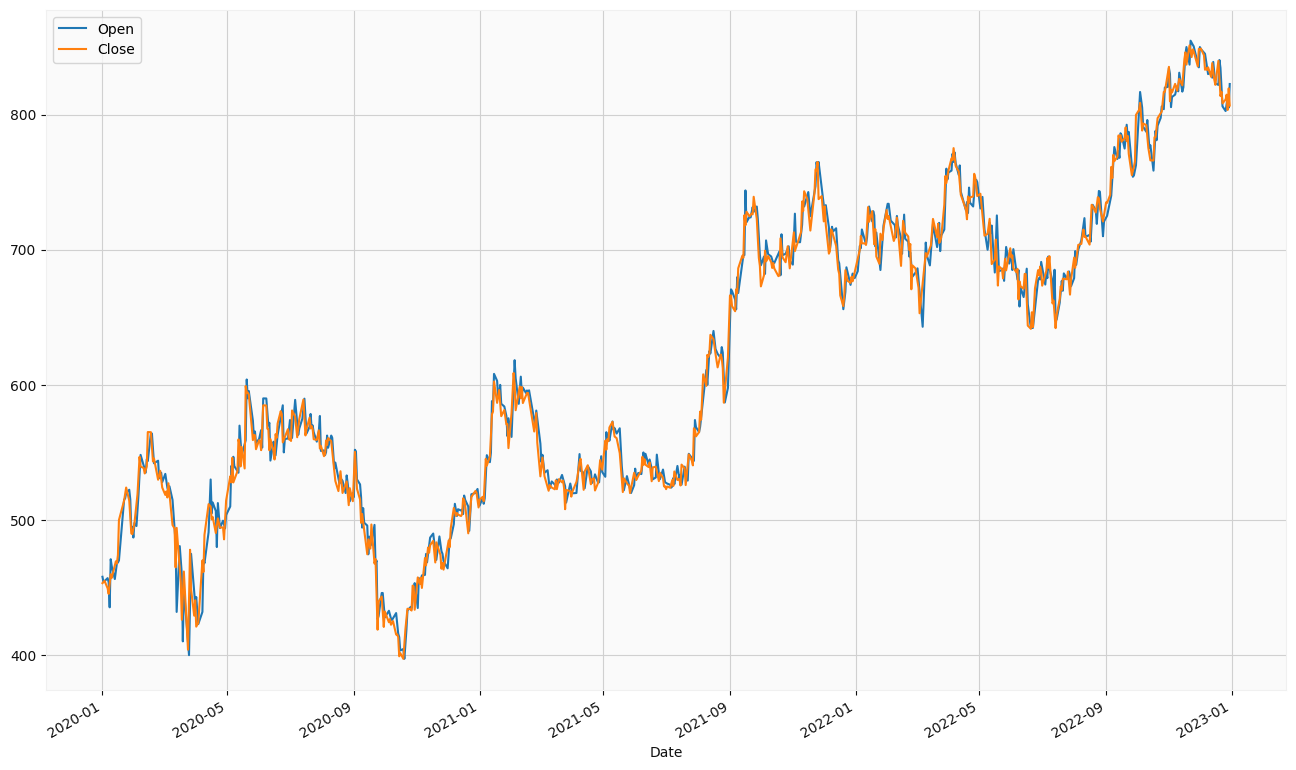

In [183]:
dfBharti.plot(y = ['Open','Close'],figsize = (16,10));

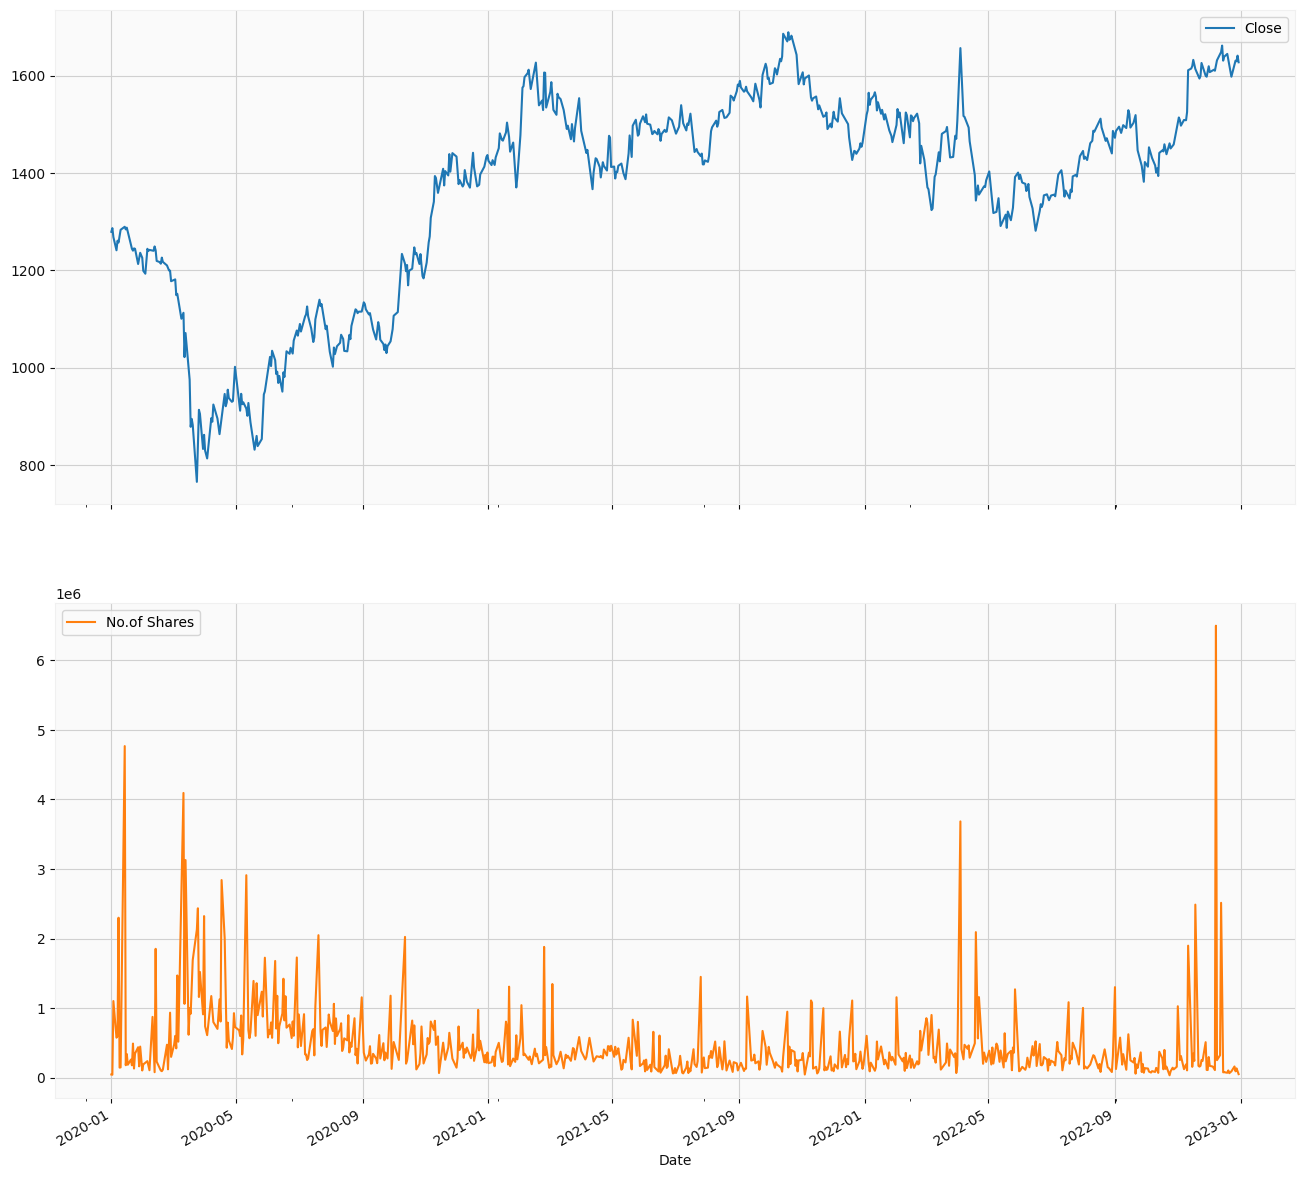

In [184]:
dfhdfc = BSEcsv2df('hdfc.csv')
dfhdfc.plot(y = ['Close','No.of Shares'],figsize = (16,16), subplots=True);

In [185]:
print(list(dfBharti.columns))

['Open', 'High', 'Low', 'Close', 'No.of Shares', 'No. of Trades', 'Turnover']


##Compare Two Companies

In [186]:
dfHDFC = BSEcsv2df('hdfc.csv')
dfHDFC.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2020-01-01,1275.0,1280.4,1271.0,1279.05,44876,2304,57316403.0
2020-01-02,1278.0,1287.9,1277.5,1286.65,41084,2219,52779249.0


In [187]:
dfHUL = BSEcsv2df('hulv.csv')
dfHUL.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2020-01-01,1931.0,1939.75,1918.25,1936.75,18752,1909,36247928.0
2020-01-02,1940.0,1952.25,1930.50,1938.15,22748,1970,44112020.0


In [188]:
df2Com = pd.merge(dfHDFC[['Close']],dfHUL[['Close']],on='Date')
df2Com.head(2)

,Close_x,Close_y
Date,,
2020-01-01,1279.05,1936.75
2020-01-02,1286.65,1938.15


In [189]:
df2Com = df2Com.rename(columns ={'Close_x':'HDFC','Close_y':'HUL'})
df2Com.head(2)

,HDFC,HUL
Date,,
2020-01-01,1279.05,1936.75
2020-01-02,1286.65,1938.15


In [152]:
startDate = pd.to_datetime(df2Com.index[0]).strftime('%d/%m/%Y')
endDate = pd.to_datetime(df2Com.index[-1]).strftime('%d/%m/%Y')
print(startDate, endDate)

01/01/2020 30/12/2022


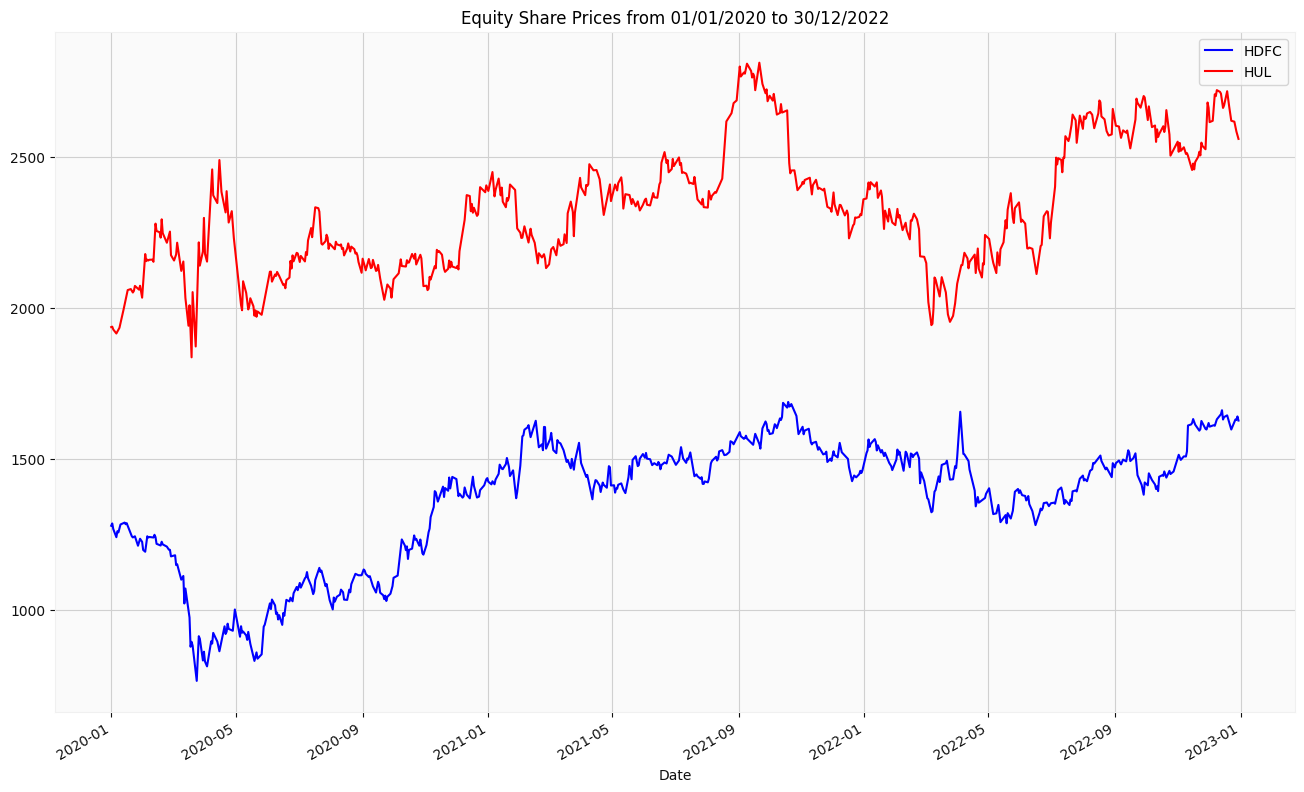

In [153]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df2Com.plot(y =['HDFC', 'HUL'], kind='line', color=['blue','red'], figsize=(16,10), title=plotTitle );



##Compare Three Companies

In [154]:
dfLNTO = BSEcsv2df('lnto.csv')
dfLNTO.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2020-01-01,1310.0,1318.45,1303.35,1310.1,154714,6663,202668026.0
2020-01-02,1310.3,1347.70,1310.30,1345.0,151270,6449,201818707.0


In [155]:
df3Com = pd.merge(df2Com[['HDFC','HUL']],dfLNTO[['Close']],on='Date')
df3Com.head(2)

,HDFC,HUL,Close
Date,,,
2020-01-01,1279.05,1936.75,1310.1
2020-01-02,1286.65,1938.15,1345.0


In [156]:
df3Com = df3Com.rename(columns ={'Close':'L&T'})
df3Com.head(2)

,HDFC,HUL,L&T
Date,,,
2020-01-01,1279.05,1936.75,1310.1
2020-01-02,1286.65,1938.15,1345.0


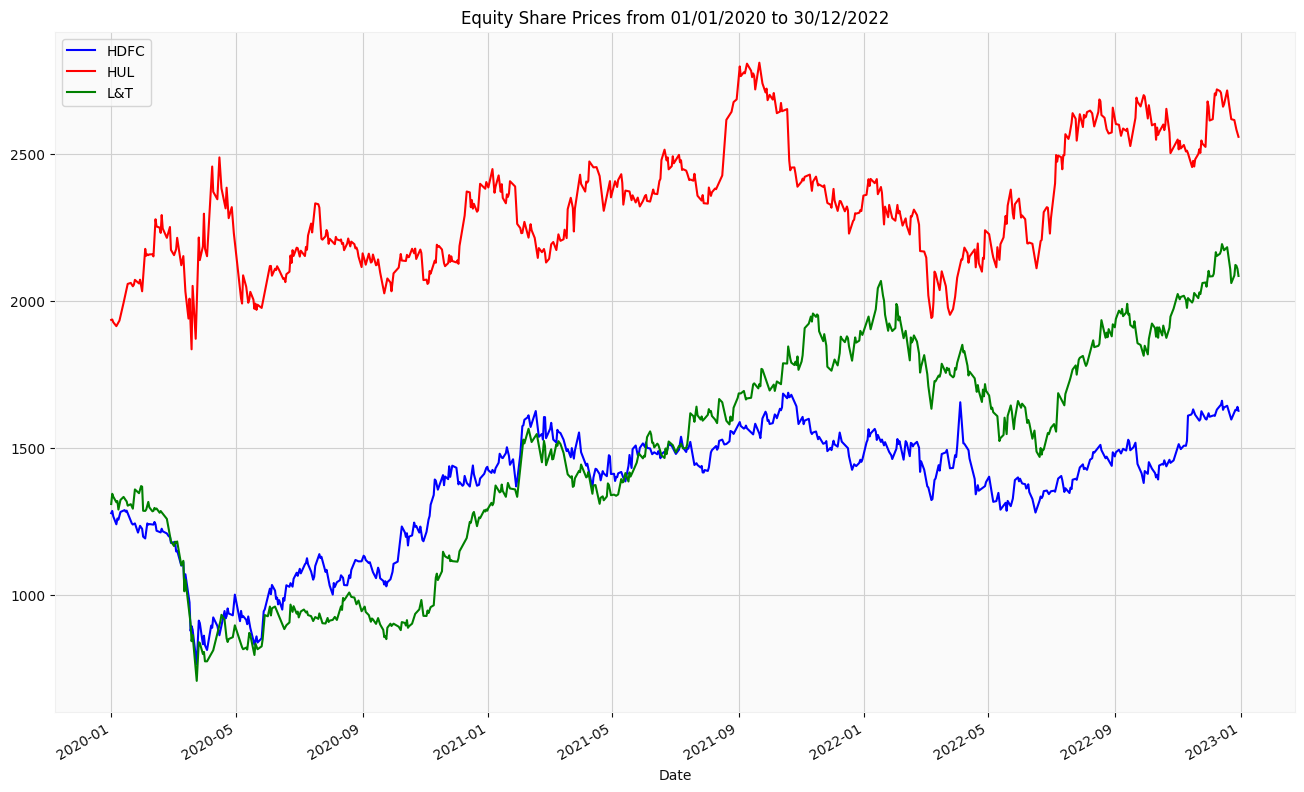

In [157]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df3Com.plot(y=['HDFC', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);


#Scaling the Data

In [190]:
df = df3Com.copy()
df.head()

,HDFC,HUL,L&T
Date,,,
2020-01-01,1279.05,1936.75,1310.10
2020-01-02,1286.65,1938.15,1345.00
2020-01-03,1268.10,1928.75,1335.15
2020-01-06,1241.15,1915.55,1316.30
2020-01-07,1260.85,1920.15,1320.25


In [191]:
df['HDFC'] = df['HDFC']/df['HDFC'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['L&T'] = df['L&T']/df['L&T'][0]
df.head(10)

,HDFC,HUL,L&T
Date,,,
2020-01-01,1.000000,1.000000,1.000000
2020-01-02,1.005942,1.000723,1.026639
2020-01-03,0.991439,0.995869,1.019121
2020-01-06,0.970369,0.989054,1.004732
2020-01-07,0.985771,0.991429,1.007748
2020-01-08,0.982800,0.996153,0.985688
2020-01-09,0.993550,0.998787,1.004427
2020-01-10,1.003245,1.008778,1.010648
2020-01-13,1.006411,1.030025,1.018510


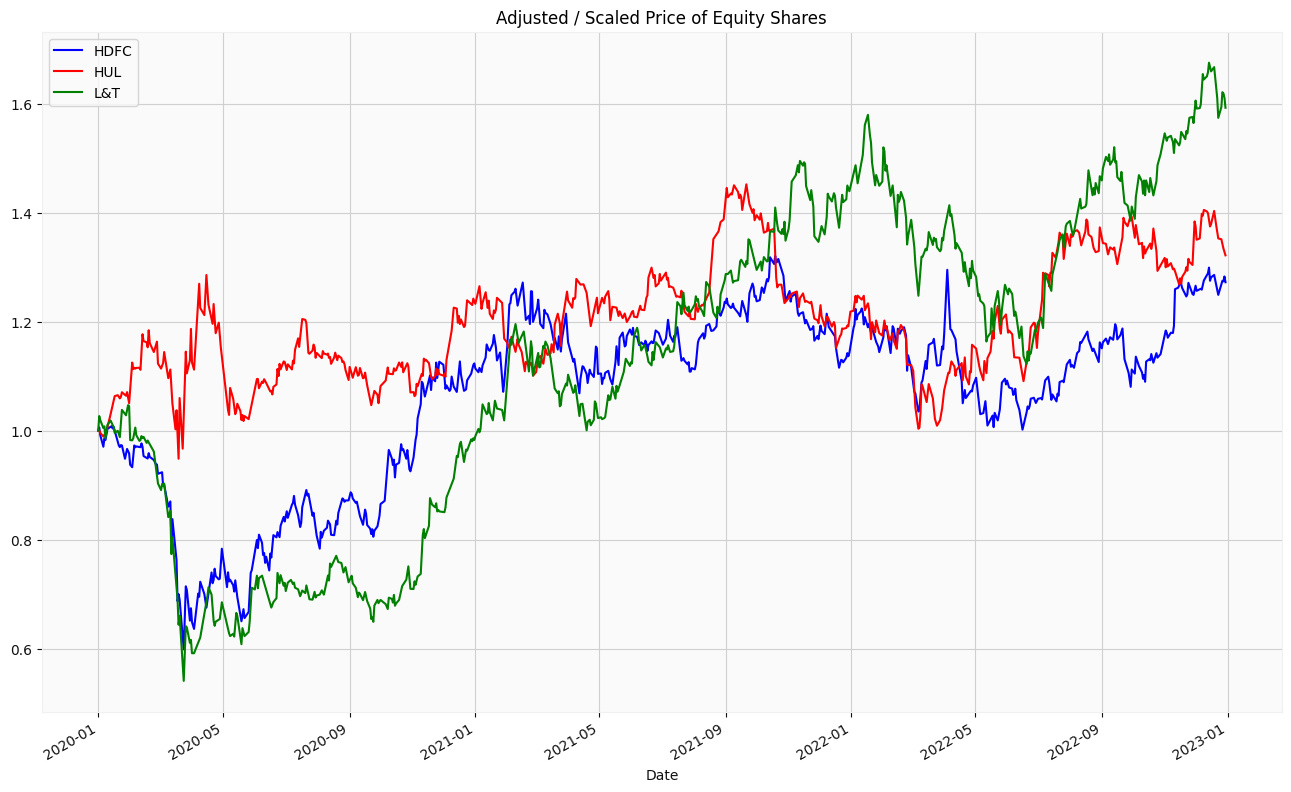

In [192]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Adjusted / Scaled Price of Equity Shares'
df.plot(y=['HDFC', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);

#Simple Moving Average

In [193]:
df = BSEcsv2df('hulv.csv')
df.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2020-01-01,1931.0,1939.75,1918.25,1936.75,18752,1909,36247928.0
2020-01-02,1940.0,1952.25,1930.50,1938.15,22748,1970,44112020.0


In [194]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,1931.0,1939.75,1918.25,1936.75,18752
2020-01-02,1940.0,1952.25,1930.50,1938.15,22748
2020-01-03,1938.0,1938.00,1919.25,1928.75,20583


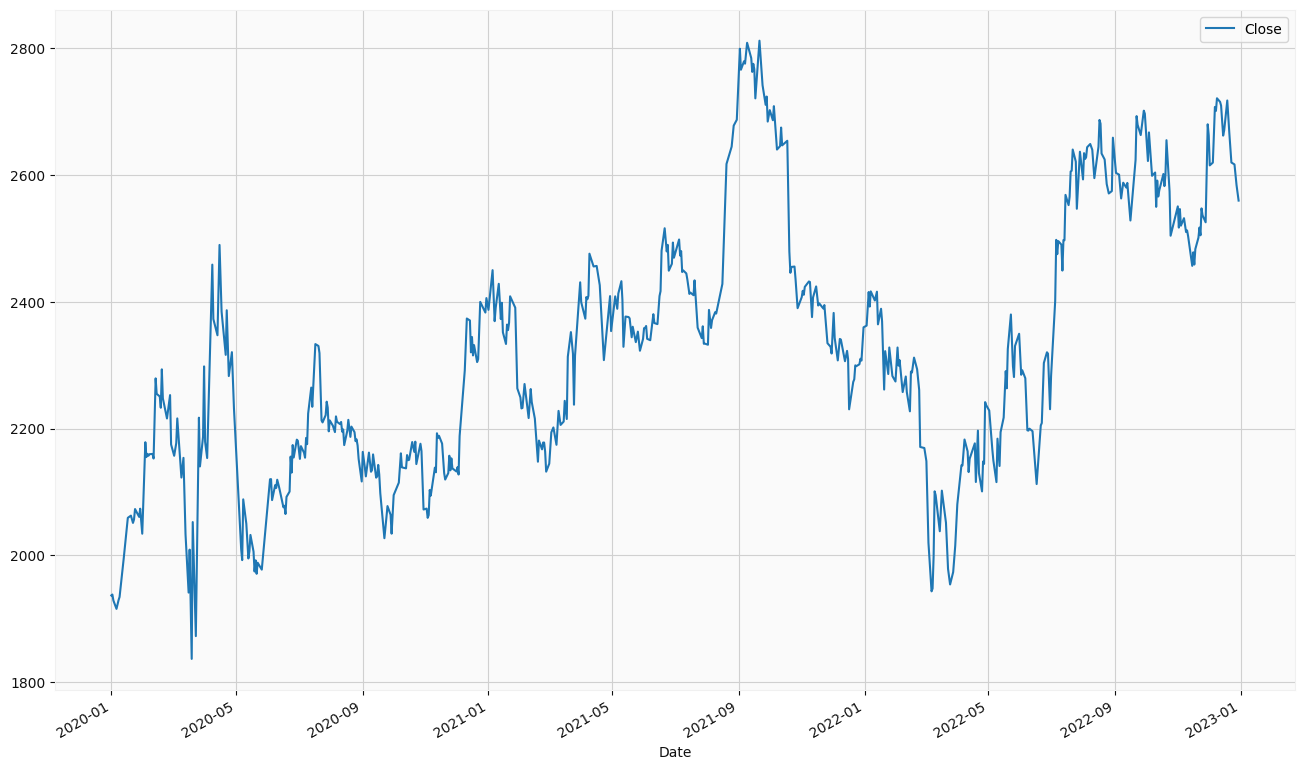

In [195]:
df.plot(y='Close', figsize=(16,10));



In [196]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

Open      748
High      748
Low       748
Close     748
Volume    748
SMA10     739
SMA30     719
dtype: int64

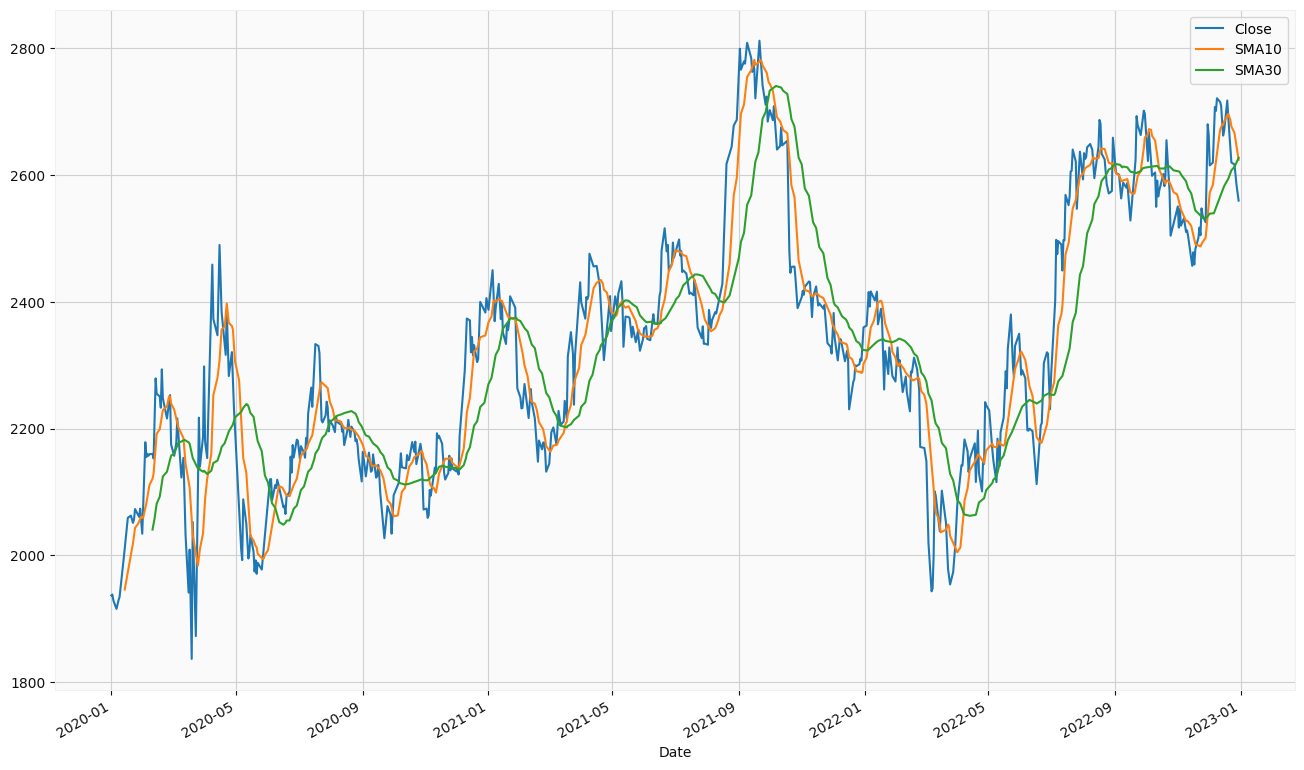

In [197]:
df.plot(y=['Close','SMA10','SMA30'], figsize=(16,10));



#Bollinger Bands
https://www.investopedia.com/terms/b/bollingerbands.asp

In [198]:
df = BSEcsv2df('hulv.csv')[['Open','High','Low','Close', 'No.of Shares']]
df = df.rename(columns ={'No.of Shares':'Volume'})
df.sample(5)                             

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,2572.15,2584.45,2555.75,2559.75,13212
2020-05-14,1991.90,2025.60,1983.95,2006.35,1350500
2021-01-01,2404.00,2404.35,2382.50,2387.40,29652
2021-11-17,2402.15,2409.95,2387.70,2394.20,46060
2021-09-01,2736.20,2774.95,2715.80,2731.00,36037


In [199]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2020-10-12,2147.0,2147.0,2123.20,2138.05,31512,2136.08,2098.73,39.43,2177.59,2019.87
2020-09-28,2087.0,2092.2,2060.00,2064.10,58327,2072.10,2112.76,40.16,2193.08,2032.44
2022-01-03,2379.0,2379.0,2353.00,2362.55,73536,2364.85,2310.26,29.23,2368.72,2251.80
2022-07-05,2380.0,2411.0,2372.45,2401.50,39491,2394.98,2229.48,71.07,2371.62,2087.34
2021-01-14,2369.0,2405.0,2351.15,2398.55,444151,2384.90,2380.62,37.94,2456.50,2304.74


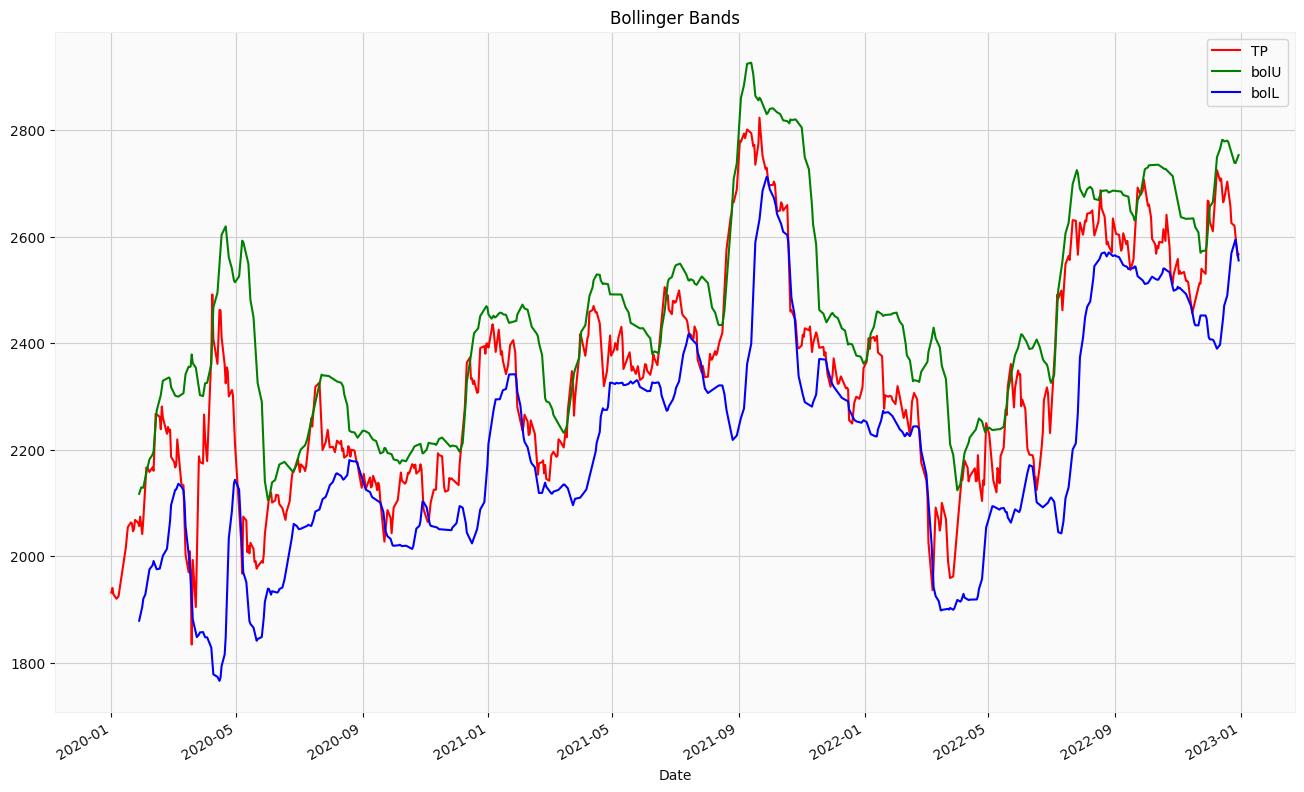

In [201]:
df.plot(y=['TP','bolU','bolL'], figsize = (16,10), color = ['red','green','blue'], grid = True, title = 'Bollinger Bands');

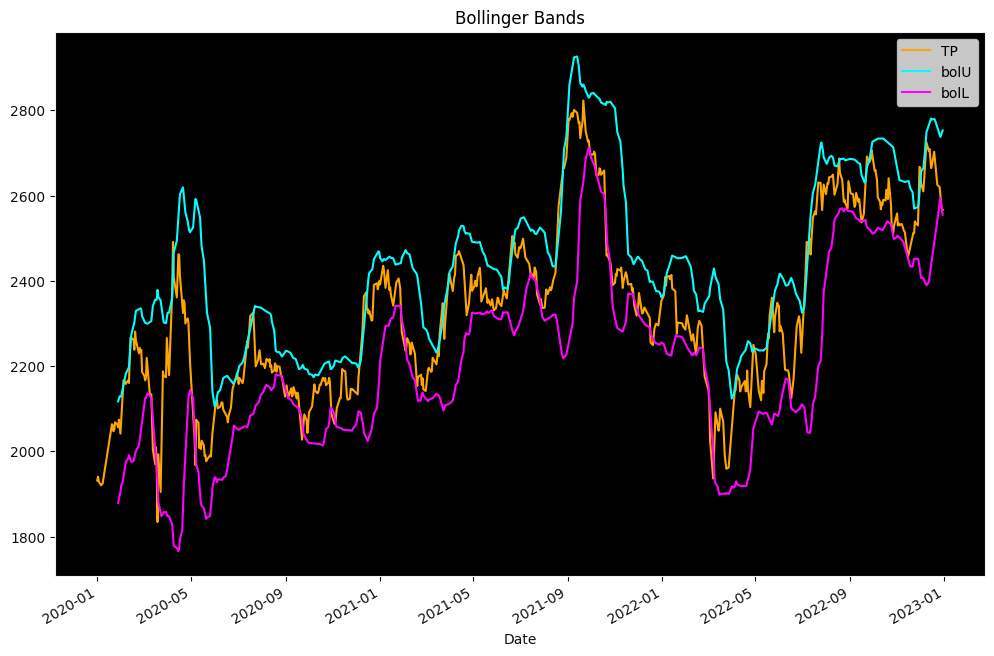

In [212]:
df.plot(y=['TP','bolU','bolL'],\
        figsize = (12,8),\
        color = ['orange','cyan','magenta'],\
        grid = False,\
        title = 'Bollinger Bands').\
        set_facecolor('black');

#Technical Charts

In [170]:
!pip install mplfinance > /dev/null
#
# https://github.com/matplotlib/mplfinance#usage
#
import mplfinance as mpf

In [171]:
df = BSEcsv2df('hdfc.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2020-01-01,1275.0,1280.40,1271.0,1279.05,44876,2304,5.731640e+07
2020-01-02,1278.0,1287.90,1277.5,1286.65,41084,2219,5.277925e+07
2020-01-03,1289.0,1289.00,1263.0,1268.10,1100857,5701,1.399249e+09
2020-01-06,1265.8,1265.80,1236.0,1241.15,574250,8176,7.187758e+08
2020-01-07,1258.3,1271.75,1252.2,1260.85,594878,6962,7.530031e+08


In [172]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,1275.0,1280.4,1271.0,1279.05,44876
2020-01-02,1278.0,1287.9,1277.5,1286.65,41084
2020-01-03,1289.0,1289.0,1263.0,1268.10,1100857


/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


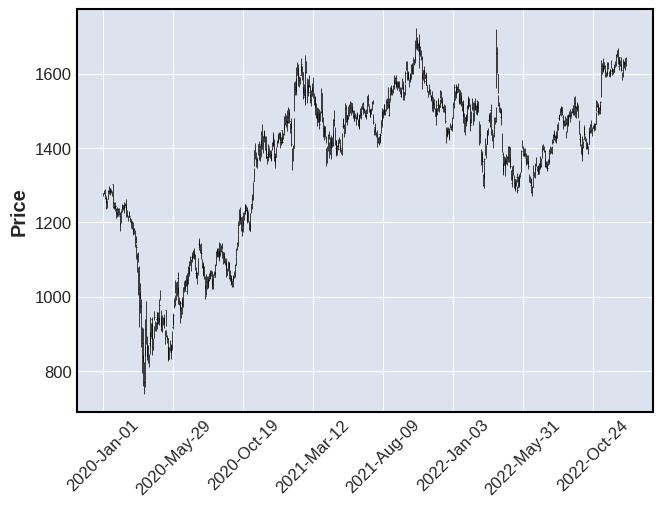

In [173]:
#very basic usage
mpf.plot(df)

In [174]:
#df.loc['2020-01-01':'2020-12-31']

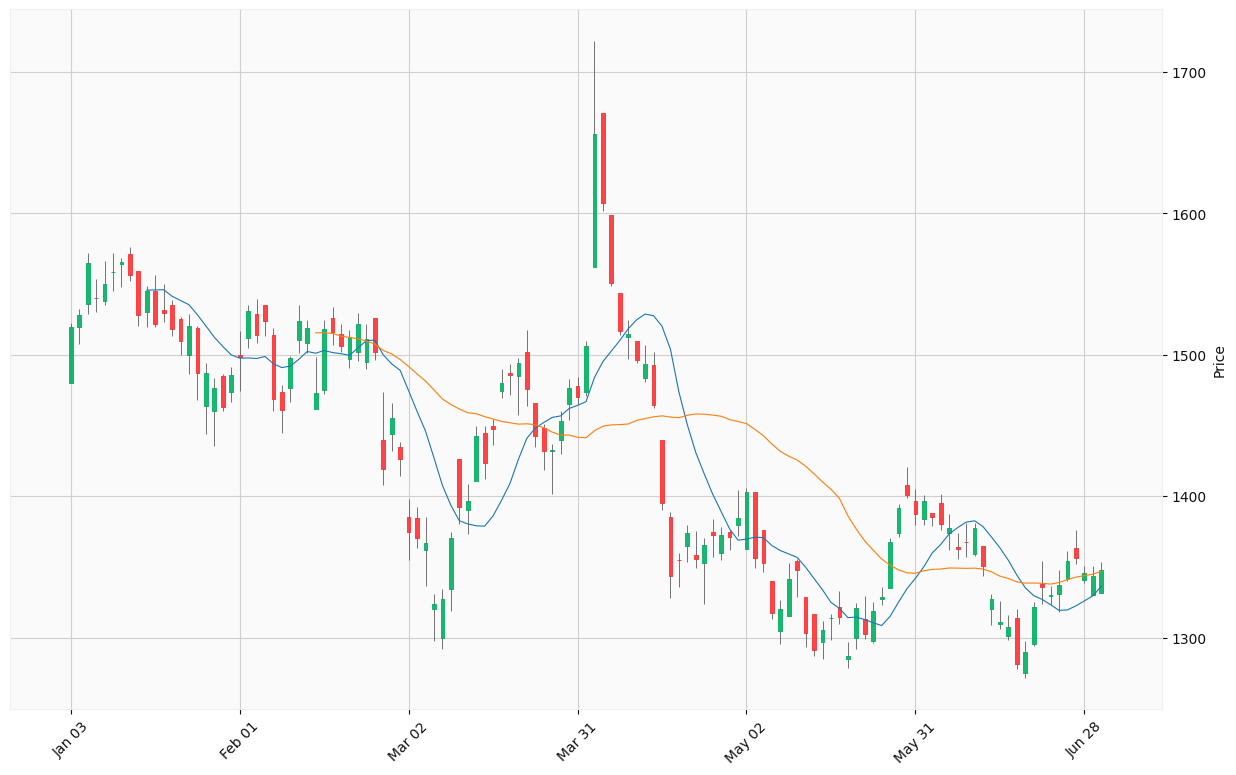

In [175]:
#add moving average and candles
mpf.plot(df.loc['2022-01-01':'2022-06-30'], type='candle',mav=(10,30), style='yahoo', figsize = (16,10))

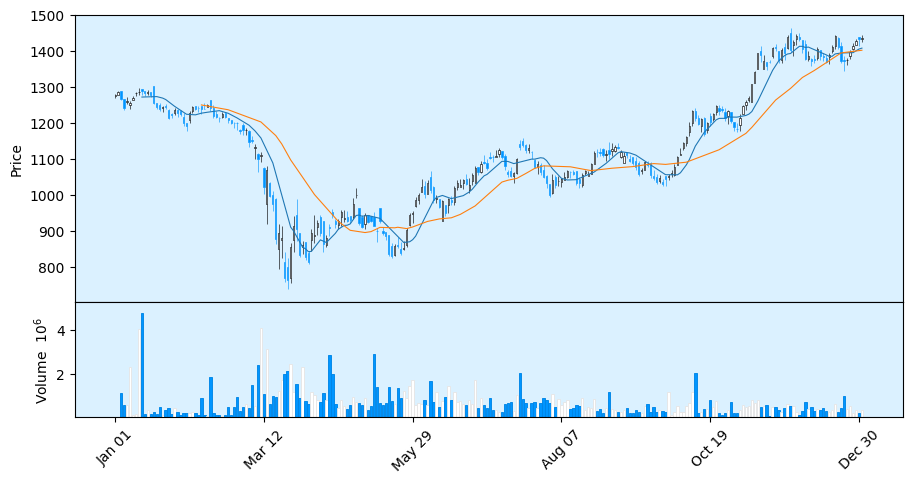

In [176]:
#add volume
mpf.plot(df.loc['2020-01-01':'2020-12-31'], type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

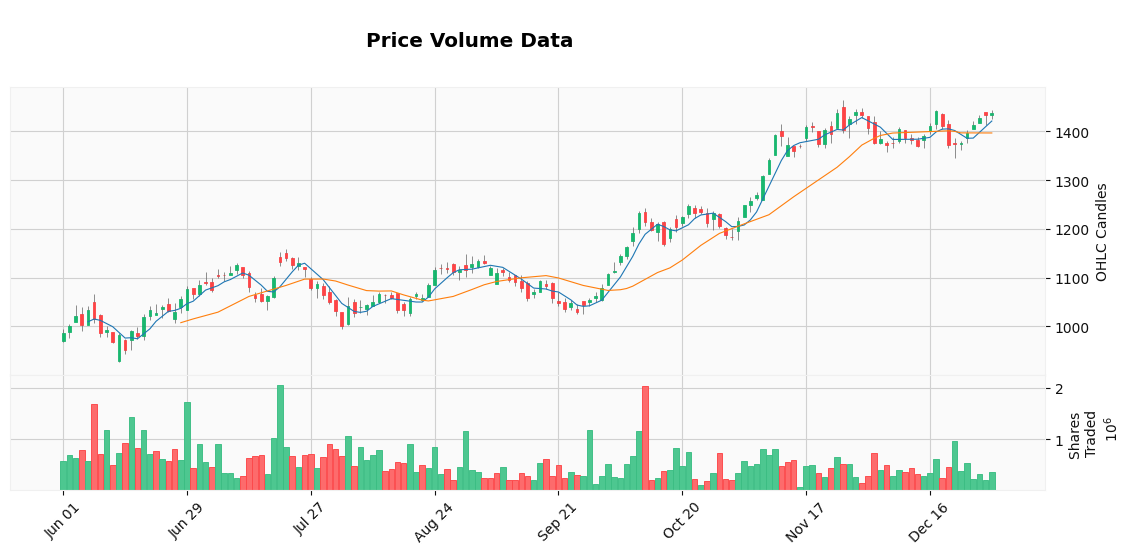

In [177]:
mpf.plot(df.loc['2020-06-01':'2020-12-31'], type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True, 
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

#Exercise 
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/NSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)